# Lecture 07: Needleman-Wunsch algorithm

In [ ]:
import pandas as pd

## Scoring scheme

Specify a scoring system.

- The structure `(a, b, c...)` is a **tuple**. It is like a list, except that once created, its content cannot be modified.

In [6]:
ss = (1, 0, -1)  # match, mismatch, gap

One can access tuple elements using their indices, just like one would do with a list or a string.

In [7]:
ss[0], ss[1], ss[2]

(1, 0, -1)

These are the input sequences. Now we want to align them using the Needleman-Wunsch algorithm according to the scoring system.

In [8]:
seq1 = 'ACGCGT'
seq2 = 'ATCGCA'

Determine the dimensions of the nxm matrices.

- Seq 1: `n` (rows)
- Seq 2: `m` (columns)

In [9]:
n = len(seq1)
m = len(seq2)

## Two-dimensional matrix

A two-dimensional matrix can be generated using a nested list. The following example creates a matrix of 5 rows and 6 columns, and fills it with zeros.

In [16]:
arr = []
for i in range(5):  # rows
  arr.append([])
  for j in range(6):  # columns
    arr[-1].append(0)
arr

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

Once the matrix is created, one can read / write individual cells using their indices (row index first, then column index).

- Don't forget that indices start with zero.
- Format for referring to matrix elements [row][col] (by index positions)

In [19]:
arr[1][2] = 3
arr

[[0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

In [20]:
arr[1][2]

3

## Score and traceback matrices

For pairwise sequence alignment, we want to create a **score matrix** and a **traceback matrix**, each with n + 1 rows and m + 1 columns.

- The creation of nested lists can be achieved using nested list comprehensions.

Score matrix

In [22]:
# j in rows, i in colummns for n+1 x m+1 matrix
sm = [[0 for i in range(m + 1)] for j in range(n + 1)] 
sm

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

Traceback matrix

In [23]:
# create a matrix of empty strings
tm = [['' for i in range(m + 1)] for j in range(n + 1)]
tm

[['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '']]

## First row and first column

- The top left cell already has the value 0, so there is nothing to be done.

In [25]:
# makes sure start cell is initialized to zero
sm[0][0]

0

Fill first row (from (0, 1) to (0, m)).

- A cell value equals to the left cell value plus the gap score.
- (row, col) index to (row, col) index

In [31]:
for i in range(m):
  sm[0][i + 1] = sm[0][i] + ss[2] #adds previous score square plus gap penalty(ss[2])
  tm[0][i + 1] = 'L'

Fill first column (from (1, 0) to (n, 0)).

- A cell value equals to the upper cell value plus the gap score.

In [34]:
for i in range(n):
  sm[i + 1][0] = sm[i][0] + ss[2] #adds previous score square plus gap penalty (ss[2])
  tm[i + 1][0] = 'U' #simutaneously fills tm matrix with direction

See what we have.

In [35]:
# where sm is the numerical score matrix and tm is the directional alpha matrix
sm, tm

([[0, -1, -2, -3, -4, -5, -6],
  [-1, 0, 0, 0, 0, 0, 0],
  [-2, 0, 0, 0, 0, 0, 0],
  [-3, 0, 0, 0, 0, 0, 0],
  [-4, 0, 0, 0, 0, 0, 0],
  [-5, 0, 0, 0, 0, 0, 0],
  [-6, 0, 0, 0, 0, 0, 0]],
 [['', 'L', 'L', 'L', 'L', 'L', 'L'],
  ['U', '', '', '', '', '', ''],
  ['U', '', '', '', '', '', ''],
  ['U', '', '', '', '', '', ''],
  ['U', '', '', '', '', '', ''],
  ['U', '', '', '', '', '', ''],
  ['U', '', '', '', '', '', '']])

## Matrix body

There are three directions. We can assign one variable for each direction. But a more elegant way is to create a **dictionary** for all three of them. Below is an example:

In [49]:
# Makes a dictionary for the cumulative scores
scores = {'L': 3, 'U': 2, 'D': 4}

With a dictionary, one can iterate over its **keys**, or **values**, or both (using **items**). This enables convenient batch operations.

In [50]:
# refers the keys from the dictionary
scores.keys()

dict_keys(['L', 'U', 'D'])

In [51]:
# gives the values for the keys
scores.values()

dict_values([3, 2, 4])

In [52]:
# Gives key and value pairs as tuples
scores.items()

dict_items([('L', 3), ('U', 2), ('D', 4)])

In [53]:
for key, value in scores.items():
    print(key, '=', value)

L = 3
U = 2
D = 4


Given this knowledge, we can now start to fill both matrices using a nested `for` loop.

In [54]:
# for each row (n)
for i in range(n):
  
  # for each column (m)
  for j in range(m):

    # calculate scores of the three directions, use binary bool values for diagonal score
    scores = {
      'L': sm[i + 1][j] + ss[2], #Left plus gap penalty
      'U': sm[i][j + 1] + ss[2], # Right plus gap penalty
      'D': sm[i][j] + ss[seq1[i] != seq2[j]]  # Diagonal plus mismatch/match, False is 0 (match), True is 1 (mismatch)
    }

    # calculate maximum score
    maximum = max(scores.values())  # The `max` function returns the maximum of multiple numbers

    # assigns maximum score to current sqaure in score matrix
    sm[i + 1][j + 1] = maximum

    # determine which direction(s) have the maximum score
    for trace, score in scores.items():  # iterate over both keys (trace) and values (score)
      if score == maximum: # checks for max score

        # append direction to traceback matrix
        tm[i + 1][j + 1] += trace

Now we can check the results.

In [55]:
sm, tm

([[0, -1, -2, -3, -4, -5, -6],
  [-1, 1, 0, -1, -2, -3, -4],
  [-2, 0, 1, 1, 0, -1, -2],
  [-3, -1, 0, 1, 2, 1, 0],
  [-4, -2, -1, 1, 1, 3, 2],
  [-5, -3, -2, 0, 2, 2, 3],
  [-6, -4, -2, -1, 1, 2, 2]],
 [['', 'L', 'L', 'L', 'L', 'L', 'L'],
  ['U', 'D', 'L', 'L', 'L', 'L', 'LD'],
  ['U', 'U', 'D', 'D', 'L', 'LD', 'L'],
  ['U', 'U', 'UD', 'D', 'D', 'L', 'L'],
  ['U', 'U', 'UD', 'D', 'UD', 'D', 'L'],
  ['U', 'U', 'UD', 'U', 'D', 'U', 'D'],
  ['U', 'U', 'D', 'U', 'U', 'D', 'UD']])

## Matrix display using Pandas

Pandas is a powerful Python library for working with tables. Here, we will use the very basic feature of it to render the matrices in a nice way.

To use a Python library, one needs to import it first.

- The word `pd` is a common abbreviation for `pandas`.

We have a matrix `sm`. Its column heads are '-' plus Seq 2; row heads (referred to as `index`) are '-' plus Seq 1. Pandas can parse these parameters to generate a table.

In [56]:
dfs = pd.DataFrame(sm, columns=list('-' + seq2), index=list('-' + seq1))
dfs

NameError: name 'pd' is not defined

In [ ]:
dft = pd.DataFrame(tm, columns=list('-' + seq2), index=list('-' + seq1))
dft

,-,A,T,C,G,C,A
-,,L,L,L,L,L,L
A,U,D,L,L,L,L,LD
C,U,U,D,D,L,LD,L
G,U,U,UD,D,D,L,L
C,U,U,UD,D,UD,D,L
G,U,U,UD,U,D,U,D
T,U,U,D,U,U,D,UD


## Trace back

- Note: This method finds one optimal solution.

Create an empty alignment (two empty strings).

In [ ]:
aln1 = ''
aln2 = ''

Start from the bottom right cell (n, m).

In [ ]:
i = n
j = m

Use a **while** loop to repeat the code until reaching the top left (0, 0) cell.

- The `while <condition>:` structure will keep executing the included code as long as the condition is True.
- In this case, the loop will start from the bottom right cell (n, m), move up / left / up-left as needed, until it reaches the top left cell (0, 0), where i + j = 0 + 0 > 0 is False, and the loop stops.

In [ ]:
while i + j > 0:

  # move left
  if 'L' in tm[i][j]:
    
    # add a gap to aligned sequence 1
    aln1 = '-' + aln1

    # take a base from sequence 2 and add it to aligned sequence 2
    aln2 = seq2[j - 1] + aln2

    # move to the left cell
    j -= 1

  # move up
  elif 'U' in tm[i][j]:
    aln1 = seq1[i - 1] + aln1
    aln2 = '-' + aln2
    i -= 1

  # move upper left
  elif 'D' in tm[i][j]:
    aln1 = seq1[i - 1] + aln1
    aln2 = seq2[j - 1] + aln2
    i -= 1
    j -= 1

## Final result

Print the result.

In [ ]:
print(aln1)
print(aln2)

A-CGCGT
ATCGCA-


## Custom function

We can combine all code into a large custom function to perform the entire pairwise sequence alignment.

In [ ]:
def pairwise_alignment(seq1, seq2, ss):
  """Compute an optimal alignment between two sequences given a scoring system.

  Parameters
  ----------
  seq1 : str
    First sequence to be aligned.
  seq2 : str
    Second sequence to be aligned.
  ss : tuple of (int, int, int)
    Scores of match, mismatch and gap.

  Returns
  -------
  str
    First sequence in alignment.
  str
    Second sequence in alignment.
  """

  # matrix dimensions
  n, m = len(seq1), len(seq2)

  # create empty matrices
  sm = [[0 for i in range(m + 1)] for j in range(n + 1)]
  tm = [['' for i in range(m + 1)] for j in range(n + 1)]

  # fill first rows and columns
  for i in range(m):
    sm[0][i + 1] = sm[0][i] + ss[2]
    tm[0][i + 1] = 'L'
  for i in range(n):
    sm[i + 1][0] = sm[i][0] + ss[2]
    tm[i + 1][0] = 'U'

  # fill matrix bodies
  for i in range(n):
    for j in range(m):
      scores = {
        'L': sm[i + 1][j] + ss[2],
        'U': sm[i][j + 1] + ss[2],
        'D': sm[i][j] + ss[seq1[i] != seq2[j]]
      }
      maximum = max(scores.values())
      sm[i + 1][j + 1] = maximum
      for trace, score in scores.items():
        if score == maximum:
          tm[i + 1][j + 1] = trace

  # trace back to determine optimal alignment
  aln1, aln2 = '', ''
  i, j = n, m
  while i + j > 0:
    if 'L' in tm[i][j]:
      aln1 = '-' + aln1
      aln2 = seq2[j - 1] + aln2
      j -= 1
    elif 'U' in tm[i][j]:
      aln1 = seq1[i - 1] + aln1
      aln2 = '-' + aln2
      i -= 1
    elif 'D' in tm[i][j]:
      aln1 = seq1[i - 1] + aln1
      aln2 = seq2[j - 1] + aln2
      i -= 1
      j -= 1

  # return alignment
  return aln1, aln2

Let's put this function to test.

In [ ]:
ss_a1 = (2, -1, -3)

In [ ]:
seq_a1 = 'GGCAGCTACG'
seq_a2 = 'GTATCGACTA'

In [ ]:
aln_a1, aln_a2 = pairwise_alignment(seq_a1, seq_a2, ss=ss_a1)

In [ ]:
print(aln_a1)
print(aln_a2)

GGCAGCTAC-G
-GTATCGACTA


We can also write this in one line.

In [ ]:
print('\n'.join(pairwise_alignment('GGCAGCTACG', 'GTATCGACTA', (1, -1, -2))))

GGCAGCTAC-G
-GTATCGACTA


## Real-world data

Now let's try some real sequences:

- Human (NM_000600.5): https://www.ncbi.nlm.nih.gov/nucleotide/NM_000600.5
- Mouse (NM_031168.2): https://www.ncbi.nlm.nih.gov/nucleotide/NM_031168.2

In [ ]:
human = 'ATGAACTCCTTCTCCACAAGCGCCTTCGGTCCAGTTGCCTTCTCCCTGGGGCTGCTCCTGGTGTTGCCTG'
mouse = 'ATGAAGTTCCTCTCTGCAAGAGACTTCCATCCAGTTGCCTTCTTGGGACTGATGCTGGTGACAACCACGG'

We can record the compute time using `%%time` at the beginning of a cell.

In [ ]:
%%time
human_aln, mouse_aln = pairwise_alignment(human, mouse, (1, -1, -2))

CPU times: user 16.8 ms, sys: 1.75 ms, total: 18.5 ms
Wall time: 22 ms


In [ ]:
print(human_aln)
print(mouse_aln)

ATGAACTCCTTCTCCACAAGCGCCTTCGGTCCAGTTGCCTTCTCCCTGGGGCTGCTCCTGGTG--TTGC-CTG
ATGAAGTTCCTCTCTGCAAGAGACTTCCATCCAGTTGCCTTCT---TGGGACTGATGCTGGTGACAACCACGG


## Appendices

The following content involves advanced Python programming skills. There is no requirement to understand or remember them, although you may explore them if you are interested. Some skills demonstrated below will be covered in future classes.

### Visualize alignment matrix

Matplotlib is a Python library for generating plots. With its help, one can plot the score matrix (cell values) and the traceback matrix (arrows) in one view.

The following code is for you to conveniently create a figure of the alignment matrix given arbitrary sequences.

In [ ]:
import matplotlib.pyplot as plt

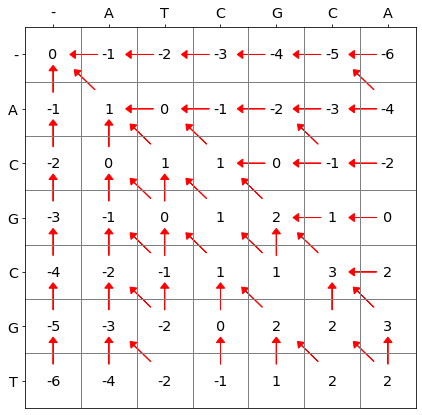

In [ ]:
# specify figure size
plt.figure(figsize=(m + 1, n + 1))

# specify graphic style
font_size = dict(size='x-large')
grid_style = dict(color='grey', lw=1)
arrow_style = dict(fc='red', ec='red', head_width=0.15, head_length=0.1)

# iterate over rows and columns
for i in range(n + 1):
  for j in range(m + 1):
    
    # print cell values
    plt.text(j + 0.5, n - i + 0.5, sm[i][j], ha='center', va='center', **font_size)

    # draw arrows
    for k in tm[i][j]:
      if k == 'L':
        plt.arrow(j + 0.3, n - i + 0.5, -0.4, 0, **arrow_style)
      elif k == 'U':
        plt.arrow(j + 0.5, n - i + 0.8, 0, 0.4, **arrow_style)
      elif k == 'D':
        plt.arrow(j + 0.25, n - i + 0.85, -0.3, 0.3, **arrow_style)

# draw grid
for i in range(n):
  plt.axhline(i + 1, **grid_style)
for j in range(m):
  plt.axvline(j + 1, **grid_style)

# print axis labels
plt.xticks([x + 0.5 for x in range(m + 1)], '-' + seq2, **font_size)
plt.yticks([x + 0.5 for x in range(n + 1)], reversed('-' + seq1), **font_size)

# specify graph range
plt.xlim(0, m + 1)
plt.ylim(0, n + 1)

# move x-axis to top
plt.gca().xaxis.tick_top();